# Prepare Data


What is it? 
- the stage after acquiring our data that ensures our data is ready for exploration and eventually modeling

- Pipeline: Plan - Acquire - **Prepare** - Explore - Model - Deliver


Why do we care?
- because we need our data to be tidy and clean for accurate exploration
- because we need our data split to be able to adaquately evaluate our model 


How do we do it?
- start with one dataframe from acquire
1. summarize the data
2. clean the data
3. split the data: train, validate, and test
- end with `prepare.py` file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import our own acquire module
import acquire

## This Lesson - Titanic Dataset

Project goal: predict who survived the titanic

## Acquire 

- use my `acquire.py` since i've already established this step

In [81]:
# get titanic data
df = acquire.get_titanic_data()

csv file found and loaded


In [82]:
#look at data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [83]:
df.describe(include='all')

passenger_id    survived      pclass   sex         age       sibsp  \
count     891.000000  891.000000  891.000000   891  714.000000  891.000000   
unique           NaN         NaN         NaN     2         NaN         NaN   
top              NaN         NaN         NaN  male         NaN         NaN   
freq             NaN         NaN         NaN   577         NaN         NaN   
mean      445.000000    0.383838    2.308642   NaN   29.699118    0.523008   
std       257.353842    0.486592    0.836071   NaN   14.526497    1.102743   
min         0.000000    0.000000    1.000000   NaN    0.420000    0.000000   
25%       222.500000    0.000000    2.000000   NaN   20.125000    0.000000   
50%       445.000000    0.000000    3.000000   NaN   28.000000    0.000000   
75%       667.500000    1.000000    3.000000   NaN   38.000000    1.000000   
max       890.000000    1.000000    3.000000   NaN   80.000000    8.000000   

             parch        fare embarked  class deck  embark_town       alone  
count   891.000000  891.000000      889    891  203          889  891.000000  
unique         NaN         NaN        3      3    7            3         NaN  
top            NaN         NaN        S  Third    C  Southampton         NaN  
freq           NaN         NaN      644    491   59          644         NaN  
mean      0.381594   32.204208      NaN    NaN  NaN          NaN    0.602694  
std       0.806057   49.693429      NaN    NaN  NaN          NaN    0.489615  
min       0.000000    0.000000      NaN    NaN  NaN          NaN    0.000000  
25%       0.000000    7.910400      NaN    NaN  NaN          NaN    0.000000  
50%       0.000000   14.454200      NaN    NaN  NaN          NaN    1.000000  
75%       0.000000   31.000000      NaN    NaN  NaN          NaN    1.000000  
max       6.000000  512.329200      NaN    NaN  NaN          NaN    1.000000

In [84]:
df.shape

(891, 13)

## Prepare

## STEP 1: Summarize

- understand your data
- visualize your variables (univariate only)

#### understand your data

In [85]:
# Get information about the dataframe: column names, rows, datatypes, non-missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


Do we know what all the columns mean? 
- passenger_id: this the unique id of a passenger
- survived: this is whether or not somewhere survived
- pclass: Passenger Class
- sex: sex
- age: age
- sibsp: Number of Siblings/Spouses Aboard
- parch: Number of Parents/Children Aboard
- fare: Passenger Fare
- embarked: 
- class:
- deck:
- embarked_town: Port of Embarkation	C = Cherbourg; Q = Queenstown; S = Southampton
- alone:

What does one row of data respresent? 
- a unique passenger with all their demographic info and ship info 

What is our target variable? 
- survived

In [86]:
df.head()

passenger_id  survived  pclass     sex   age  sibsp  parch     fare  \
0             0         0       3    male  22.0      1      0   7.2500   
1             1         1       1  female  38.0      1      0  71.2833   
2             2         1       3  female  26.0      0      0   7.9250   
3             3         1       1  female  35.0      1      0  53.1000   
4             4         0       3    male  35.0      0      0   8.0500   

  embarked  class deck  embark_town  alone  
0        S  Third  NaN  Southampton      0  
1        C  First    C    Cherbourg      0  
2        S  Third  NaN  Southampton      1  
3        S  First    C  Southampton      0  
4        S  Third  NaN  Southampton      1

#### visualize your data (univariate)

In [87]:
#find numeric columns
num_col = df.select_dtypes(include='number').columns
num_col

Index(['passenger_id', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare',
       'alone'],
      dtype='object')

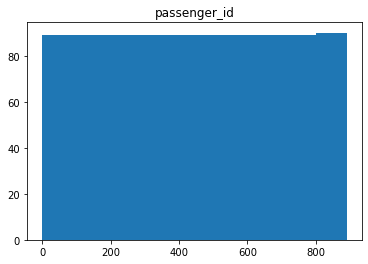

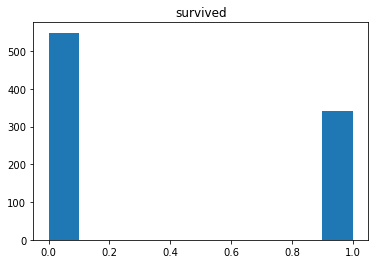

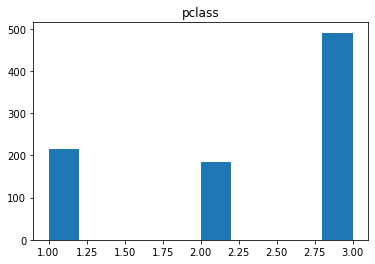

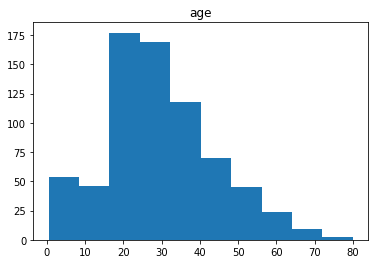

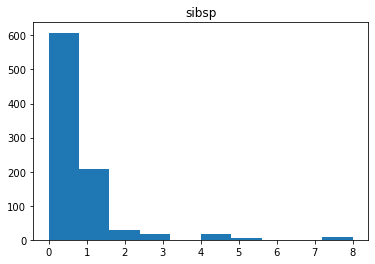

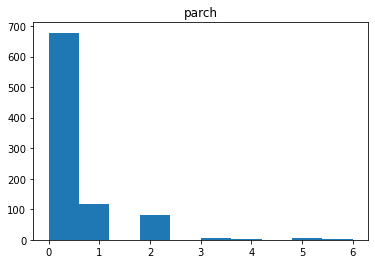

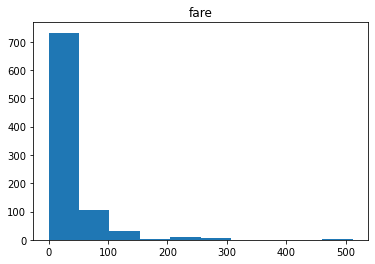

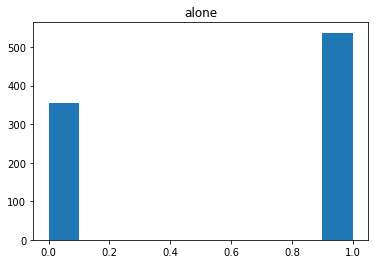

In [88]:
#plot distributions of numeric columns
for col in num_col:
#     print(col)
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [89]:
#get string columns
str_col = df.columns [df.dtypes == 'object']
str_col

Index(['sex', 'embarked', 'class', 'deck', 'embark_town'], dtype='object')

In [92]:
df.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [90]:
#see the null values
df.deck.value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

sex
male      577
female    314
Name: sex, dtype: int64
male      0.647587
female    0.352413
Name: sex, dtype: float64


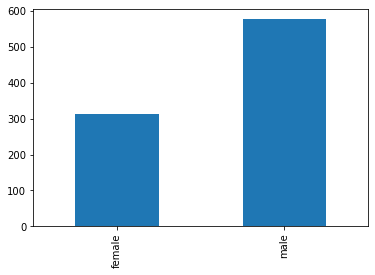


embarked
S    644
C    168
Q     77
Name: embarked, dtype: int64
S    0.724409
C    0.188976
Q    0.086614
Name: embarked, dtype: float64


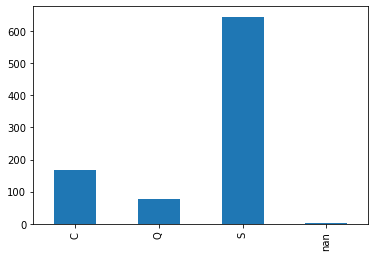


class
Third     491
First     216
Second    184
Name: class, dtype: int64
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64


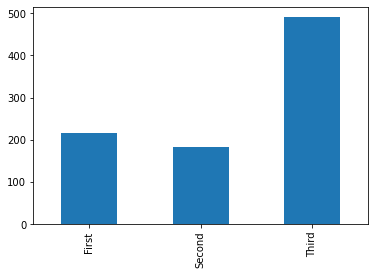


deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
C    0.290640
B    0.231527
D    0.162562
E    0.157635
A    0.073892
F    0.064039
G    0.019704
Name: deck, dtype: float64


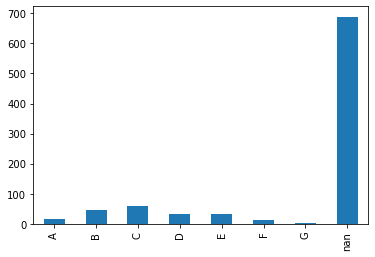


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64


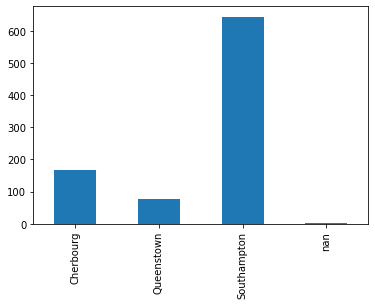

In [91]:
#plot distributions of string columns
for col in str_col:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True)) #percentage
    df[col].value_counts(dropna=False).sort_index().plot.bar()
    plt.show()
    print()

# STEP 2: Clean the data

- take care of duplicates
- verify datatypes
- handle nulls
- consider outliers
- for modeling: make all columns numeric

Note: there are other things to consider in the prepare phase that we will talk about in future methodologies

### Duplicate Data

In [45]:
#look at data
df.head()

passenger_id  survived  pclass     sex   age  sibsp  parch     fare  \
0             0         0       3    male  22.0      1      0   7.2500   
1             1         1       1  female  38.0      1      0  71.2833   
2             2         1       3  female  26.0      0      0   7.9250   
3             3         1       1  female  35.0      1      0  53.1000   
4             4         0       3    male  35.0      0      0   8.0500   

  embarked  class deck  embark_town  alone  
0        S  Third  NaN  Southampton      0  
1        C  First    C    Cherbourg      0  
2        S  Third  NaN  Southampton      1  
3        S  First    C  Southampton      0  
4        S  Third  NaN  Southampton      1

#### are there any duplicates in passenger_id?

In [51]:
df.passenger_id.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: passenger_id, Length: 891, dtype: bool

In [52]:
df.passenger_id.duplicated().sum()

0

In [53]:
df [df.passenger_id.duplicated()]

Empty DataFrame
Columns: [passenger_id, survived, pclass, sex, age, sibsp, parch, fare, embarked, class, deck, embark_town, alone]
Index: []

#### embarked and embark_town columns

In [55]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [56]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [57]:
#view counts across both
pd.crosstab(df.embark_town, df.embarked)

embarked       C   Q    S
embark_town              
Cherbourg    168   0    0
Queenstown     0  77    0
Southampton    0   0  644

In [61]:
#drop unnecessary column
df = df.drop(columns='embark_town')

In [62]:
#verify
df.head()

passenger_id  survived  pclass     sex   age  sibsp  parch     fare  \
0             0         0       3    male  22.0      1      0   7.2500   
1             1         1       1  female  38.0      1      0  71.2833   
2             2         1       3  female  26.0      0      0   7.9250   
3             3         1       1  female  35.0      1      0  53.1000   
4             4         0       3    male  35.0      0      0   8.0500   

  embarked  class deck  alone  
0        S  Third  NaN      0  
1        C  First    C      0  
2        S  Third  NaN      1  
3        S  First    C      0  
4        S  Third  NaN      1

#### pclass and class columns

In [64]:
#view counts across both
pd.crosstab(df.pclass, df['class'])

class   First  Second  Third
pclass                      
1         216       0      0
2           0     184      0
3           0       0    491

**Note:** The machine learning models can only accept numeric values. Therefore, we will remove the class column instead the pclass column.

In [66]:
#drop unnecessary column
df = df.drop(columns='class')

In [70]:
pd.crosstab(df.sibsp, df.alone)

alone    0    1
sibsp          
0       71  537
1      209    0
2       28    0
3       16    0
4       18    0
5        5    0
8        7    0

### Verify Datatypes

In [68]:
df.dtypes

passenger_id      int64
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
deck             object
alone             int64
dtype: object

In [69]:
df.head()

passenger_id  survived  pclass     sex   age  sibsp  parch     fare  \
0             0         0       3    male  22.0      1      0   7.2500   
1             1         1       1  female  38.0      1      0  71.2833   
2             2         1       3  female  26.0      0      0   7.9250   
3             3         1       1  female  35.0      1      0  53.1000   
4             4         0       3    male  35.0      0      0   8.0500   

  embarked deck  alone  
0        S  NaN      0  
1        C    C      0  
2        S  NaN      1  
3        S    C      0  
4        S  NaN      1

### Handle Nulls

some options
- delete all nulls rows
- delete that column
- fill with a median value (numeric columns) 
- fill with the mode (string columns)
- fill with with 0

Note: not all these answers will make sense for your column!!

In [ ]:
#find were null values are


In [ ]:
#isolate nulls values


#### age

In [ ]:
#check counts


In [ ]:
#check percentage


In [ ]:
#plot it


- there doesnt seem like an appropriate value to replace
- we will delete the entire column, for now
- with more time, i might come back and see if there is a way to keep the age column 

In [ ]:
#drop


In [ ]:
#verify 


#### deck

- there are way too much null values
- will definitely delete this column

#### embark_town

In [ ]:
#look at embark_town value counts with nulls


We could fill `embark_town` with most common value, 'Southampton', by hard-coding the value using the `fillna()` function

In [ ]:
#fill it!


In [ ]:
#verify


### Outliers

options
- keep 
- remove
- stretch/compress

There are a few outliers potentially in sibsp, parch, but without specific domain knowledge related to the titanic, I am not going to remove those outliers or snap them/compress them, I will ignore them for now.

### For Modeling: Make all columns numeric (encode)
- machine learning models only work with numeric values

#### Therefore, we have to Encode!

- Encoding -- turning a string into a number


Two strategies:
- label encoding -- associate each unique value with a number
    - use the label encoder when the categories have an inherit order
- one-hot encoding (get_dummies) -- turn each unique value into a separate column with either 1 or 0
    - use one-hot encoding when there is no order 

*Note: Curse of dimensionality*
- An increase in the dimensions can, in theory, add more information to the data thereby improving the quality of data but practically increases the noise and redundancy during its analysis
- An increase in dimensionality it implies an increase in the number of features

also known as Hughes phenomenon: https://miro.medium.com/v2/resize:fit:1400/format:webp/1*pcJdd2y924Xk61SXa7uYpw.jpeg

#### one-hot encoding
- `pd.get_dummies`
- get dummy vars for both sex and embark_town columns

In [ ]:
#look at sex data


In [ ]:
#use get_dummies on sex data


In [ ]:
#drop first column


In [ ]:
# create dummy variables for 'sex' and 'embark_town'


In [ ]:
# concatenate the dummy_df dataframe above with the original df and validate.


> i will keep my string values in my dataframe for now. as i will need them for exploration. 

### Now that everything is clean, lets make a function!

In [ ]:
# def clean_titanic(df):
#     '''
#     This function will clean the the titanic dataset
#     '''
#     df = df.drop(columns =['embarked','class','age','deck'])

#     df.embark_town = df.embark_town.fillna(value='Southampton')

#     dummy_df = pd.get_dummies(df[['sex','embark_town']], drop_first=True)
#     df = pd.concat([df, dummy_df], axis=1)
#     return df

Testing that the function does what we intend for it to do:

In [ ]:
#acquire fresh copy of titanic function


In [ ]:
#use clean function


# Step 3: Splitting

- Start with single dataframe
- End with three dataframes: train, validate, test
    - **train:** data to explore, clean, scale, and fit 
    - **validate, test:** represents unseen data
        - **validate:** confirm our top models have not overfit
        - **test:** test our top model -- ONLY USED ON 1 MODEL!

To accomplish this
- do two splits using sklean 
- train dataset should be the bulk of the dataframe ~60%
- validate should be about ~20%
- test should be about ~20%

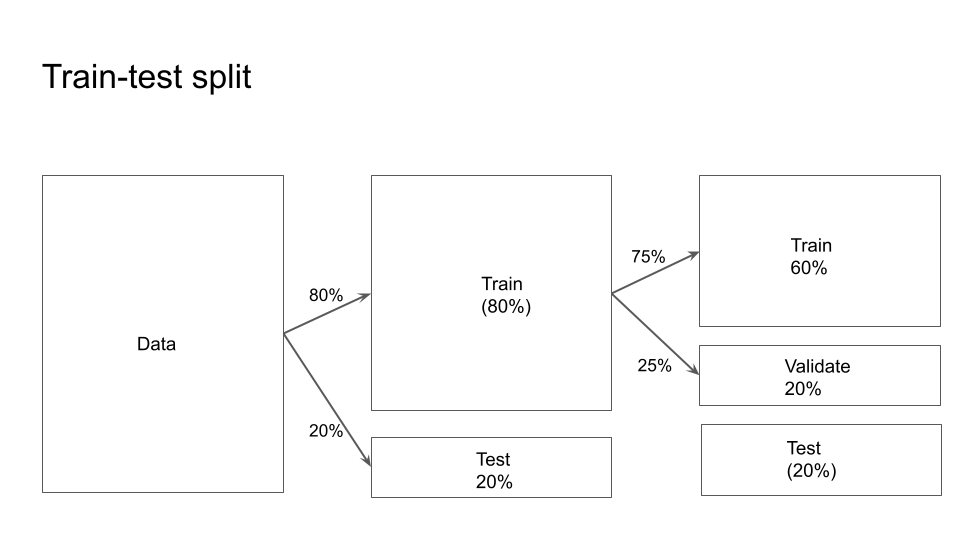

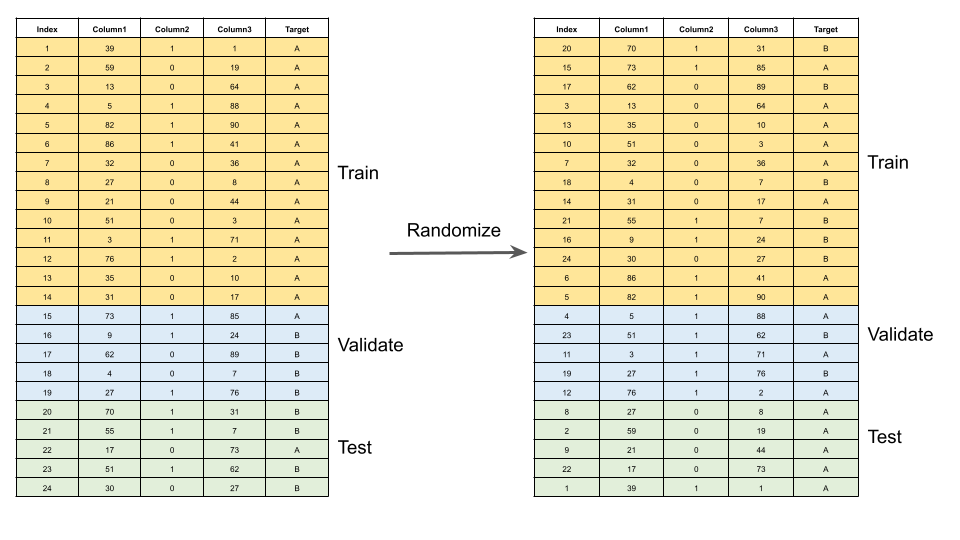

Our target variable contains A and B. Notice how many B values made it into the train dataset. 

Let's correct this by stratifing on our target variable.

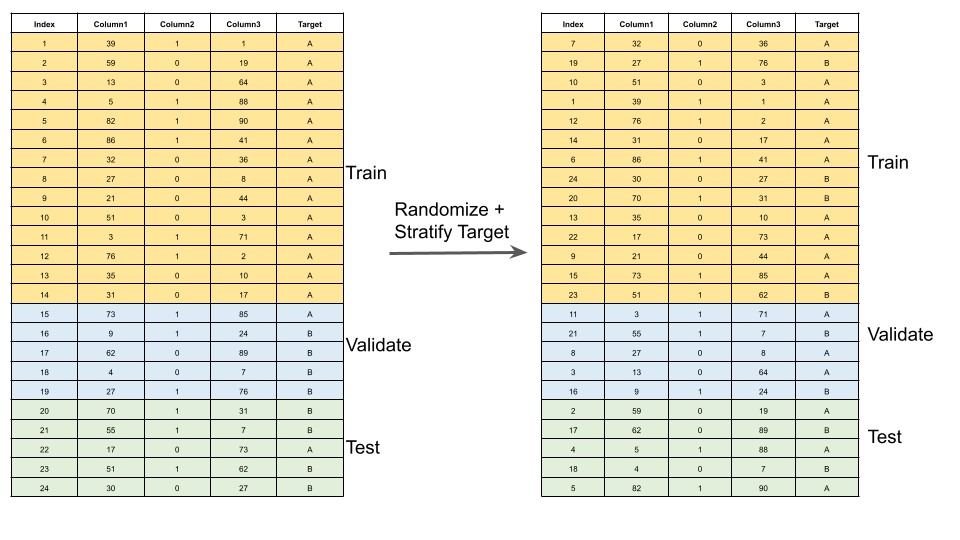

Sklearn allows us to split our data easily:  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# import splitting functions


In [ ]:
#first split


In [ ]:
# Observe split
print(f'Prepared df: {df.shape}')
print()
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Note: this is our first split. there is only train and test. we still need our second split for validate. 

In [ ]:
#second split


In [ ]:
# Observe split
print(f'Prepared df: {df.shape}')
print()
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

- Train is now 60% of our data
- Validate is now 20% of our data
- Test is now 20% of our data

### Turn it into a function

In [ ]:
# def split_titanic(df):
#     '''
#     Takes in the titanic dataframe and return train, validate, test subset dataframes
#     '''
#     train, test = train_test_split(df,
#                                    test_size=.2, 
#                                    random_state=123, 
#                                    stratify=df.survived)
#     train, validate = train_test_split(train, 
#                                        test_size=.25, 
#                                        random_state=123, 
#                                        stratify=train.survived)
#     return train, validate, test

Test our new function!

In [ ]:
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

### We can create a function made of both of our prepare functions!

In [ ]:
# Another function? YES PLZ!
# def prep_titanic_data(df):
#     '''
#     The ultimate dishwasher - clean data and split my titanic
#     '''
#     df = clean_titanic(df)
#     train, validate, test = split_titanic(df)
    
#     return train, validate, test

In [ ]:
# Run final prepare function and validate what that the function is working properly.


In [ ]:
print(f'Clean df: {df_fresh.shape}')
print()
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

All three functions that we created can be will be added to a .py file!
- clean_titanic
- split_titanic
- prep_titanic

We end our prepare phase with a prepare.py with all our functions

## Option for Missing Values: Impute


Impute: Assign a value to something by inference


Strategies for imputing:
- fill with 0
- fill with the average
- fill with the median
- fill with subgroup mean
- fill with most frequent value
- build a model to predict missing values



We will use `sklearn.imputer.SimpleImputer` to do this.  

0. Split data into train/validate/test
1. Create the imputer object
    - use determined strategy for impyting
2. Fit to train 
    - used determined strategy to calculated imputed value
    - updates imputer object
3. Transform train/validate/test
    - fill missing values with imputed value on our train, validate, and test df

### lets revisit our initial titanic dataset & fill in the nulls from embark_town

In [ ]:
#get fresh titanic data


In [ ]:
#look at nulls of embark_town


#### Step 0. Split data into train/validate/test

In [ ]:
#split the data


In [ ]:
print('embark_town nulls\n')
print(f'train nulls: {train.embark_town.isnull().sum()}')
print(f'validate nulls: {validate.embark_town.isnull().sum()}')
print(f'test nulls: {test.embark_town.isnull().sum()}')

#### Step 1. Create the imputer object

Create the `SimpleImputer` object, which we will store in the variable `imputer`. In the creation of the object, we will specify the strategy to use (mean, median, most_frequent). Essentially, this is creating the instructions and assigning them to a variable, `imputer`.

In [ ]:
# import imputing functions


In [ ]:
# SimpleImputer?

In [ ]:
# Define the thing using (strategy = 'most_frequent')


#### Step 2. Fit to train 

This means that the imputer will determine the most_frequent value, or other value depending on the strategy called, for each column, in the training set only

In [ ]:
# fit the thing using imputer.fit()


It will store that value in the imputer object. We can call different attributes to see what is stored in the importer. 

#### Step 3. Transform train/validate/test

Use our imputer object to `transform`. We will call `transform` on our train, validate, and test datasets to fill any missing values.

In [ ]:
# Use the thing using imputer.transform()


In [ ]:
# Validate that there are no longer any Null values in embark_town.
print('embark_town nulls\n')
print(f'train nulls: {train.embark_town.isnull().sum()}')
print(f'validate nulls: {validate.embark_town.isnull().sum()}')
print(f'test nulls: {test.embark_town.isnull().sum()}')